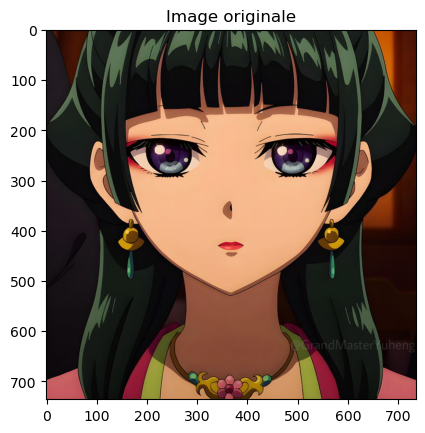

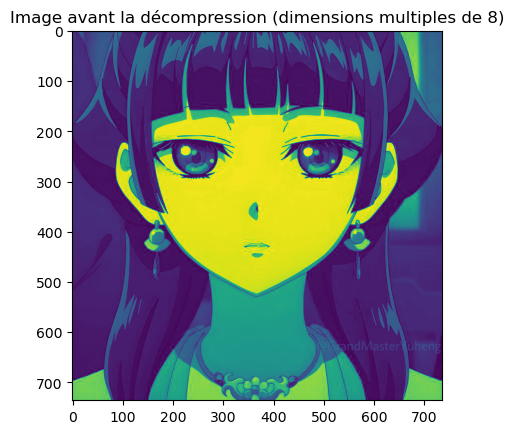

Taux de compression : 88.94%


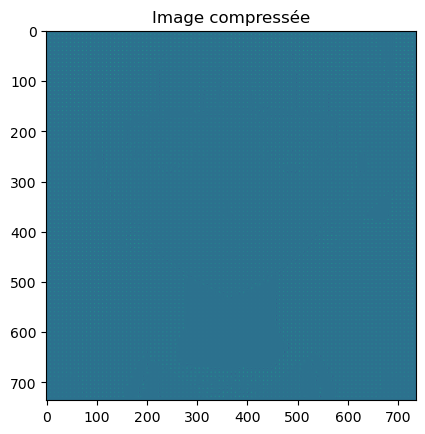

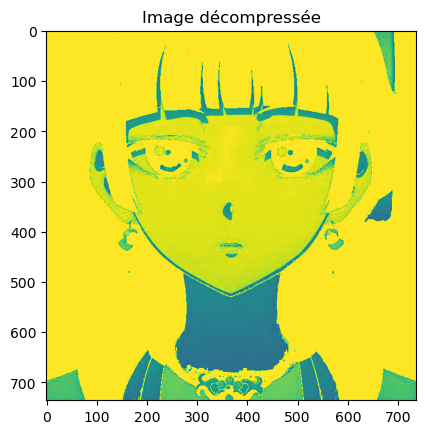

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Lecture de l'image
image_path = 'maomao.jpg'
image = mpimg.imread(image_path)

plt.imshow(image)
plt.title("Image originale")
plt.show()

# Dimensions de l'image et troncature pour être multiple de 8
hauteur, largeur = image.shape[:2]
new_hauteur = (hauteur // 8) * 8
new_largeur = (largeur // 8) * 8
image_tronque = image[:new_hauteur, :new_largeur]

# Extraction de la composante rouge
composante_rouge = image_tronque[:, :, 0]
plt.imshow(composante_rouge)
plt.title("Image avant la décompression (dimensions multiples de 8)")
plt.show()


# Centrer les intensités entre -128 et 127
composante_rouge = (composante_rouge * 255).astype(int) if composante_rouge.max() <= 1 else composante_rouge
composante_rouge_centrée = composante_rouge - 128

# Génération de la matrice P (DCT)
P = np.zeros((8, 8))
for i in range(8):
    for j in range(8):
        ck = 1 / math.sqrt(2) if i == 0 else 1
        P[i, j] = (1 / 2) * ck * math.cos(((2 * j + 1) * i * math.pi) / 16)

# Matrice de quantification JPEG
Q = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
              [12, 12, 13, 19, 26, 58, 60, 55],
              [14, 13, 16, 24, 40, 57, 69, 56],
              [14, 17, 22, 29, 51, 87, 80, 62],
              [18, 22, 37, 56, 68, 109, 103, 77],
              [24, 35, 55, 64, 81, 104, 113, 92],
              [49, 64, 78, 87, 103, 121, 120, 101],
              [72, 92, 95, 98, 112, 100, 103, 99]])

# Compression
image_compressée = np.zeros_like(composante_rouge_centrée, dtype=float)
for i in range(0, new_hauteur, 8):
    for j in range(0, new_largeur, 8):
        block = composante_rouge_centrée[i:i+8, j:j+8]
        D = P @ block @ P.T  # DCT
        D = np.divide(D, Q)  # Quantification
        D = np.round(D)  # Arrondi
        image_compressée[i:i+8, j:j+8] = D

# Taux de compression
non_zero_coefficients = np.count_nonzero(image_compressée)
total_coefficients = image_compressée.size
compression_rate = 100 * (1 - non_zero_coefficients / total_coefficients)
print(f"Taux de compression : {compression_rate:.2f}%")

plt.imshow(image_compressée)
plt.title("Image compressée")
plt.show()

# Décompression
image_decompressée = np.zeros_like(composante_rouge_centrée, dtype=float)
for i in range(0, new_hauteur, 8):
    for j in range(0, new_largeur, 8):
        block = image_compressée[i:i+8, j:j+8]
        block = block * Q  # Déquantification
        block = P.T @ block @ P  # Inverse DCT
        image_decompressée[i:i+8, j:j+8] = block

# Recentrer les intensités
image_decompressée += 128
image_decompressée = np.clip(image_decompressée, 0, 255).astype(np.uint8)

plt.imshow(image_decompressée)
plt.title("Image décompressée")
plt.show()
